In [1]:
import maze2 as mz2
import maze as mz
import numpy as np
import matplotlib.pyplot as plt
import qlearning as ql
from sarsa import sarsa
from MC import mc
import tqdm
from utility import monte_carlo_success

In [2]:
# Create a maze
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 3],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
env = mz2.Maze(maze)
env_p0 = mz2.Maze(maze, poison_prob=0)

In [3]:
f1 = "results/VI_m2_p0_g0.98.npy"

In [49]:
# Discount Factor
gamma = 0.98
# Accuracy treshold
epsilon = 0.0001
V, policy_1 = mz2.value_iteration(env_p0, gamma, epsilon)
np.save(f1, (V))

In [4]:
V = np.load(f1, allow_pickle=True)
policy_1 = env.transition_probabilities.transpose(1,2,0).dot(V).argmax(axis=1)

In [52]:
print(monte_carlo_success(policy_1, env))
print(V[env.start_state()], V[env.winning_state_representative])

100%|██████████| 1000/1000 [00:05<00:00, 196.95it/s]

0.574
26.95143529126679 49.120602669713875


In [10]:
f2 = "results/q50k_m2_p0_eps0.2_g0.98.npy"

In [ ]:
alpha = 2/3
epsilon = 0.2
n_episodes = 50000
Q_2, policy_2, v_start_2 = ql.qlearning(env_p0, gamma, alpha, epsilon, n_episodes)
np.save(f2, (Q_2))

In [20]:
Q_2 = np.load(f2, allow_pickle=True)
policy_2 = Q_2.argmax(axis=1)

In [21]:
print(monte_carlo_success(policy_2, env))
print(Q_2[env.start_state()].max())

100%|██████████| 1000/1000 [00:05<00:00, 191.13it/s]

0.533
9.98675209994707


In [22]:
f3 = "results/q50k_m2_p0_eps0.1_g0.98.npy"

In [ ]:
alpha = 2/3
epsilon = 0.1
n_episodes = 50000
Q_3, policy_3, v_start_3 = ql.qlearning(env_p0, gamma, alpha, epsilon, n_episodes)
np.save(f3, (Q_3))

In [23]:
Q_3 = np.load(f3, allow_pickle=True)
policy_3 = Q_3.argmax(axis=1)

In [24]:
print(monte_carlo_success(policy_3, env))
print(Q_3[env.start_state()].max())

100%|██████████| 1000/1000 [00:04<00:00, 204.06it/s]

0.517
10.31649439132762


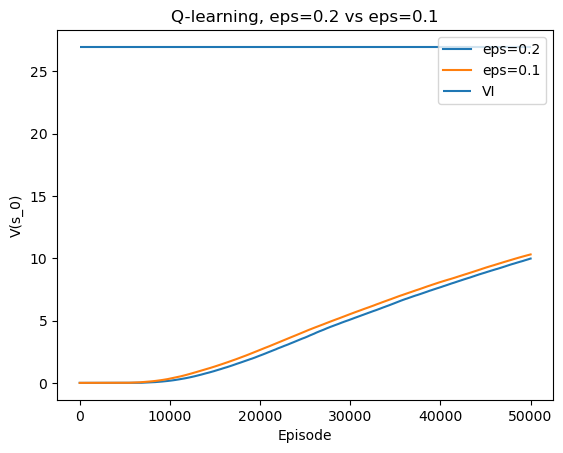

In [9]:
plt.plot(v_start_2, label="eps=0.2")
plt.plot(v_start_3, label="eps=0.1")
plt.xlabel("Episode")
plt.ylabel("V(s_0)")
plt.hlines(V[env.start_state()], 0, n_episodes, label="VI")
plt.legend()
plt.title("Q-learning, eps=0.2 vs eps=0.1")
plt.savefig("1.i.b.pdf")

In [10]:
epsilon = 0.2

In [29]:
f4 = "results/q50k_m2_p0_eps0.2_g0.98_a0.6.npy"

In [ ]:
alpha = 0.6
n_episodes = 50000
Q_4, policy_4, v_start_4 = ql.qlearning(env_p0, gamma, alpha, epsilon, n_episodes)
np.save(f4, (Q_4))

In [30]:
Q_4 = np.load(f4, allow_pickle=True)
policy_4 = Q_4.argmax(axis=1)

In [27]:
print(monte_carlo_success(policy_4, env))
print(Q_4[env.start_state()].max())

100%|██████████| 1000/1000 [00:05<00:00, 187.50it/s]

0.54
20.589329081236496


In [28]:
f5 = "results/q50k_m2_p0_eps0.2_g0.98_a0.9.npy"

In [ ]:
alpha = 0.9
n_episodes = 50000
Q_5, policy_5, v_start_5 = ql.qlearning(env_p0, gamma, alpha, epsilon, n_episodes)
np.save(f5, (Q_5))

In [29]:
Q_5 = np.load(f5, allow_pickle=True)
policy_5 = Q_5.argmax(axis=1)

In [30]:
print(monte_carlo_success(policy_5, env))
print(Q_5[env.start_state()].max())

100%|██████████| 1000/1000 [00:06<00:00, 166.47it/s]

0.387
0.016383505323183


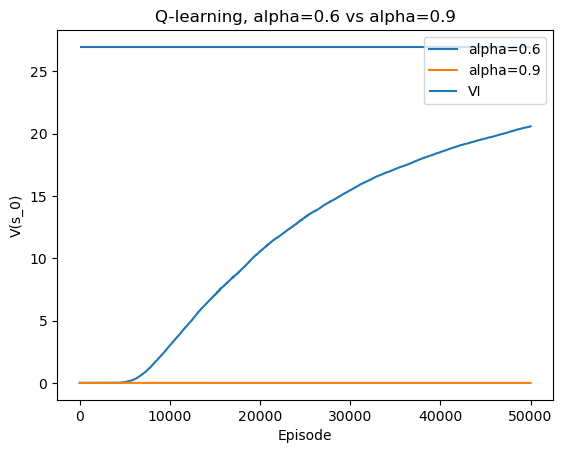

In [15]:
plt.plot(v_start_4, label="alpha=0.6")
plt.plot(v_start_5, label="alpha=0.9")
plt.xlabel("Episode")
plt.ylabel("V(s_0)")
plt.hlines(V[env.start_state()], 0, n_episodes, label="VI")
plt.legend()
plt.title("Q-learning, alpha=0.6 vs alpha=0.9")
plt.savefig("1.i.c.pdf")

## 1.j

In [8]:
f6 = "results/sarsa50k_m2_p0_eps0.2_g0.98.npy"

In [9]:
gamma = 0.98
alpha = 2/3
epsilon = 0.2
n_episodes = 50000
Q_6, policy_6, v_start_6 = sarsa(env_p0, gamma, alpha, epsilon, n_episodes, eps_mode=0)
np.save(f6, (Q_6))

100%|██████████| 50000/50000 [09:03<00:00, 91.96it/s] 


In [10]:
Q_6 = np.load(f6, allow_pickle=True)
policy_6 = Q_6.argmax(axis=1)

In [11]:
print(monte_carlo_success(policy_6, env))
print(Q_6[env.start_state()].max())

100%|██████████| 1000/1000 [00:04<00:00, 226.76it/s]

0.537
0.42266393997025176


In [12]:
f7 = "results/sarsa50k_m2_p0_eps0.1_g0.98.npy"

In [13]:
alpha = 2/3
epsilon = 0.1
n_episodes = 50000
Q_7, policy_7, v_start_7 = sarsa(env_p0, gamma, alpha, epsilon, n_episodes, eps_mode=0)
np.save(f7, (Q_7))

100%|██████████| 50000/50000 [09:03<00:00, 92.00it/s] 


In [14]:
Q_7 = np.load(f7, allow_pickle=True)
policy_7 = Q_7.argmax(axis=1)

In [15]:
print(monte_carlo_success(policy_7, env))
print(Q_7[env.start_state()].max())

100%|██████████| 1000/1000 [00:04<00:00, 215.52it/s]

0.498
0.8434356282583335


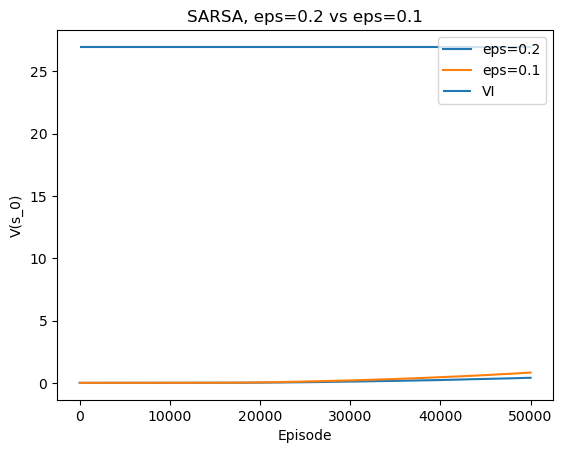

In [16]:
plt.plot(v_start_6, label="eps=0.2")
plt.plot(v_start_7, label="eps=0.1")
plt.xlabel("Episode")
plt.ylabel("V(s_0)")
plt.hlines(V[env.start_state()], 0, n_episodes, label="VI")
plt.legend()
plt.title("SARSA, eps=0.2 vs eps=0.1")
plt.savefig("1.j.b.pdf")

In [17]:
epsilon = 0.2

In [18]:
f8 = "results/sarsa50k_m2_p0_eps0.2_g0.98_d0.6.npy"

In [19]:
alpha = 2/3
n_episodes = 50000
delta=0.6
Q_8, policy_8, v_start_8 = sarsa(env_p0, gamma, alpha, epsilon, n_episodes, delta=delta, eps_mode=2)
np.save(f8, (Q_8))

100%|██████████| 50000/50000 [09:04<00:00, 91.90it/s] 


In [20]:
Q_8 = np.load(f8, allow_pickle=True)
policy_8 = Q_8.argmax(axis=1)

In [21]:
print(monte_carlo_success(policy_8, env))
print(Q_8[env.start_state()].max())

100%|██████████| 1000/1000 [00:05<00:00, 177.95it/s]

0.365
2.7346266757740727


In [22]:
f9 = "results/q50k_m2_p0_eps0.2_g0.98_d0.9.npy"

In [23]:
alpha = 2/3
delta = 0.9
n_episodes = 50000
Q_9, policy_9, v_start_9 = sarsa(env_p0, gamma, alpha, epsilon, n_episodes, delta=delta, eps_mode=2)
np.save(f9, (Q_9))

100%|██████████| 50000/50000 [08:56<00:00, 93.13it/s] 


In [24]:
Q_9 = np.load(f9, allow_pickle=True)
policy_9 = Q_9.argmax(axis=1)

In [25]:
print(monte_carlo_success(policy_9, env))
print(Q_9[env.start_state()].max())

100%|██████████| 1000/1000 [00:05<00:00, 185.68it/s]

0.388
5.6571398763077605


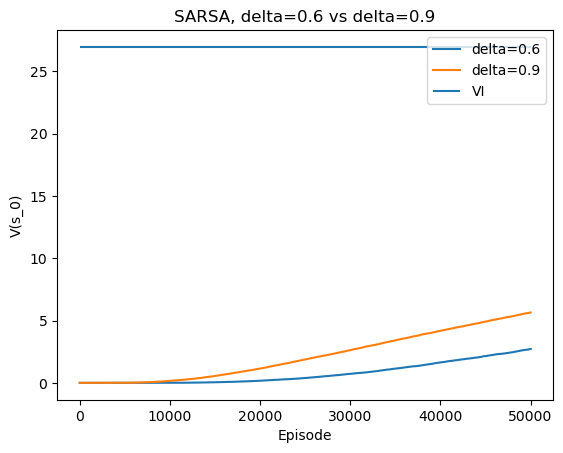

In [26]:
plt.plot(v_start_8, label="delta=0.6")
plt.plot(v_start_9, label="delta=0.9")
plt.xlabel("Episode")
plt.ylabel("V(s_0)")
plt.hlines(V[env.start_state()], 0, n_episodes, label="VI")
plt.legend()
plt.title("SARSA, delta=0.6 vs delta=0.9")
plt.savefig("1.j.c.pdf")

In [31]:
print(monte_carlo_success(policy_4, env, N=10000))
print(Q_4[env.start_state()].max(), Q_4[env.winning_state_representative].max())

100%|██████████| 10000/10000 [00:43<00:00, 228.70it/s]

0.5374
20.589329081236496 48.49154019590369


In [28]:
print(monte_carlo_success(policy_6, env, N=10000))
print(Q_6[env.start_state()].max(), Q_6[env.winning_state_representative].max())

100%|██████████| 10000/10000 [00:44<00:00, 223.94it/s]

0.5538
0.42266393997025176 38.38025887119001


In [32]:
print(monte_carlo_success(policy_1, env, N=10000))
print(V[env.start_state()], V[env.winning_state_representative])

100%|██████████| 10000/10000 [00:42<00:00, 237.59it/s]

0.56
26.95143529126679 49.120602669713875


In [33]:
V[env.start_state()]/ V[env.winning_state_representative]

0.5486788399663538

In [34]:
Q_6[env.start_state()].max() / Q_6[env.winning_state_representative].max()

0.01101253489166856

In [ ]:
V[env.winning_state_representative]*(1-gamma)

0.9824120533942784

In [ ]:
# env_old = mz.Maze(maze)
env_old_p0 = mz.Maze(maze, poison_prob=0)
f10 = "results/VI_m_p0_g0.98.npy"
# Discount Factor
gamma = 0.98
# Accuracy treshold
epsilon = 0.0001
V_2, policy_V2 = mz.value_iteration(env_p0, gamma, epsilon)
np.save(f10, (V))
V = np.load(f10, allow_pickle=True)
policy_V2 = env.transition_probabilities.transpose(1,2,0).dot(V).argmax(axis=1)